In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from glob import glob

In [ ]:
# Setting variables for later use
data = []
labels = []
image_sizes = []
classes = 43
cur_path = os.getcwd()

# Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join('/content/drive/MyDrive/German Road Signs Project/','Train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
            height, width, channels = image.shape
            image_sizes.append((height, width))
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

<ipython-input-2-470267d6841e>:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(data)


In [ ]:
print(data.shape, labels.shape)

(39222,) (39222,)


In [ ]:
image_sizes

[(31, 31),
 (33, 33),
 (38, 37),
 (43, 42),
 (76, 72),
 (93, 86),
 (72, 76),
 (74, 70),
 (49, 52),
 (45, 45),
 (69, 63),
 (38, 38),
 (28, 27),
 (33, 31),
 (35, 34),
 (61, 64),
 (54, 53),
 (66, 59),
 (84, 85),
 (29, 28),
 (38, 35),
 (31, 31),
 (39, 40),
 (61, 57),
 (55, 55),
 (48, 47),
 (39, 42),
 (82, 83),
 (60, 56),
 (41, 39),
 (118, 112),
 (88, 81),
 (52, 52),
 (53, 50),
 (73, 68),
 (36, 34),
 (28, 30),
 (60, 62),
 (74, 70),
 (33, 34),
 (30, 29),
 (39, 40),
 (34, 34),
 (95, 92),
 (52, 50),
 (148, 144),
 (33, 34),
 (110, 108),
 (58, 59),
 (48, 50),
 (31, 31),
 (28, 29),
 (33, 34),
 (108, 107),
 (59, 57),
 (30, 29),
 (43, 43),
 (124, 122),
 (61, 63),
 (33, 33),
 (56, 54),
 (39, 38),
 (63, 62),
 (31, 31),
 (34, 34),
 (35, 37),
 (34, 33),
 (58, 59),
 (75, 76),
 (85, 81),
 (29, 30),
 (42, 41),
 (37, 37),
 (48, 47),
 (36, 36),
 (44, 46),
 (54, 56),
 (40, 43),
 (30, 29),
 (60, 56),
 (85, 83),
 (34, 33),
 (104, 109),
 (33, 34),
 (100, 97),
 (40, 41),
 (88, 84),
 (45, 47),
 (32, 32),
 (108, 1

In [ ]:
max_height = 0
max_width = 0
max_size = 0

for item in image_sizes:
    if item[0] > max_height:
        max_height = item[0]
    if item[1] > max_width:
        max_width = item[1]
    if item[0] * item[1] > max_size:
      max_size = item[0] * item[1]

print("Maximum height:", max_height)
print("Maximum width:", max_width)
print("Maximum size", max_size)

Maximum height: 225
Maximum width: 243
Maximum size 54675


In [ ]:
min_height = max_height
min_width = max_width
min_size = max_size

for item in image_sizes:
    if item[0] < min_height:
        min_height = item[0]
    if item[1] < min_width:
        min_width = item[1]
    if item[0] * item[1] < min_size:
      min_size = item[0] * item[1]

print("Maximum height:", min_height)
print("Maximum width:", min_width)
print("Maximum size", min_size)

Maximum height: 25
Maximum width: 25
Maximum size 625


In [ ]:
traindata = pd.read_csv(r'/content/drive/MyDrive/German Road Signs Project/Train.csv')
testdata = pd.read_csv(r'/content/drive/MyDrive/German Road Signs Project/Test.csv')
metadata = pd.read_csv(r'/content/drive/MyDrive/German Road Signs Project/Meta.csv')

In [ ]:
traindata[["Height", "Width"]].describe()

,Height,Width
count,39209.000000,39209.000000
mean,50.328930,50.835880
std,23.115423,24.306933
min,25.000000,25.000000
25%,35.000000,35.000000
50%,43.000000,43.000000
75%,58.000000,58.000000
max,225.000000,243.000000


In [ ]:
testdata[["Height", "Width"]].describe()

,Height,Width
count,12630.000000,12630.000000
mean,50.364450,50.507759
std,23.698908,25.088483
min,25.000000,25.000000
25%,35.000000,34.000000
50%,43.000000,43.000000
75%,57.000000,58.000000
max,232.000000,266.000000


In [ ]:
traindata[["ClassId"]].value_counts()

ClassId
2          2250
1          2220
13         2160
12         2100
38         2070
10         2010
4          1980
5          1860
25         1500
9          1470
7          1440
3          1410
8          1410
11         1320
35         1200
18         1200
17         1110
31          780
14          780
33          689
15          630
26          600
28          540
23          510
30          450
16          420
34          420
6           420
36          390
22          390
40          360
20          360
21          330
39          300
29          270
24          270
41          240
42          240
32          240
27          240
37          210
19          210
0           210
dtype: int64

Values of results column
     Counts  Percentage
2     2250    5.738478
1     2220    5.661965
13    2160    5.508939
12    2100    5.355913
38    2070    5.279400
10    2010    5.126374
4     1980    5.049861
5     1860    4.743809
25    1500    3.825652
9     1470    3.749139
7     1440    3.672626
3     1410    3.596113
8     1410    3.596113
11    1320    3.366574
18    1200    3.060522
35    1200    3.060522
17    1110    2.830983
14     780    1.989339
31     780    1.989339
33     689    1.757250
15     630    1.606774
26     600    1.530261
28     540    1.377235
23     510    1.300722
30     450    1.147696
16     420    1.071183
6      420    1.071183
34     420    1.071183
22     390    0.994670
36     390    0.994670
40     360    0.918157
20     360    0.918157
21     330    0.841644
39     300    0.765130
29     270    0.688617
24     270    0.688617
32     240    0.612104
27     240    0.612104
41     240    0.612104
42     240    0.612104
37     210    0.535591
0      2

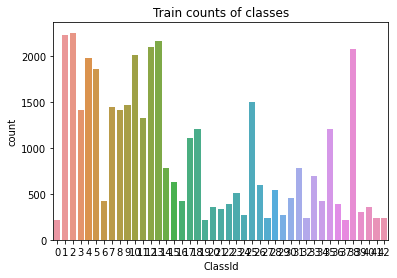

In [ ]:
sns.countplot(data = traindata, x="ClassId").set(title="Train counts of classes") 
data_results = traindata["ClassId"]
results = pd.concat([data_results.value_counts(),data_results.value_counts(normalize=True).mul(100)],
                axis=1,keys=("Counts", "Percentage")) # Creates a data frame with counts and percentage of the Result feature
print("Values of results column\n",results)

Values of results column
     Counts  Percentage
2      750    5.938242
1      720    5.700713
13     720    5.700713
38     690    5.463183
12     690    5.463183
4      660    5.225653
10     660    5.225653
5      630    4.988124
9      480    3.800475
25     480    3.800475
3      450    3.562945
8      450    3.562945
7      450    3.562945
11     420    3.325416
35     390    3.087886
18     390    3.087886
17     360    2.850356
31     270    2.137767
14     270    2.137767
15     210    1.662708
33     210    1.662708
26     180    1.425178
30     150    1.187648
16     150    1.187648
28     150    1.187648
6      150    1.187648
23     150    1.187648
22     120    0.950119
36     120    0.950119
34     120    0.950119
24      90    0.712589
29      90    0.712589
20      90    0.712589
40      90    0.712589
21      90    0.712589
39      90    0.712589
42      90    0.712589
32      60    0.475059
27      60    0.475059
41      60    0.475059
19      60    0.475059
0       

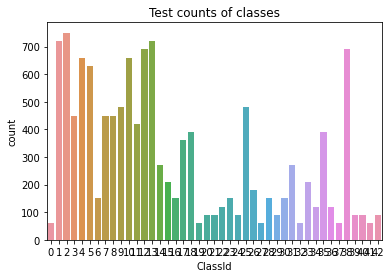

In [ ]:
sns.countplot(data = testdata, x="ClassId").set(title="Test counts of classes") 
data_results = testdata["ClassId"]
results = pd.concat([data_results.value_counts(),data_results.value_counts(normalize=True).mul(100)],
                axis=1,keys=("Counts", "Percentage")) # Creates a data frame with counts and percentage of the Result feature
print("Values of results column\n",results)

Text(0.5, 1.0, 'Pixel Height of Training Data')

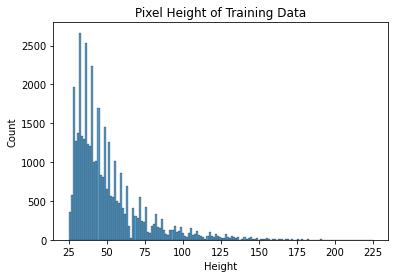

In [ ]:
sns.histplot(traindata["Height"])
plt.title("Pixel Height of Training Data")

Text(0.5, 1.0, 'Pixel Width of Training Data')

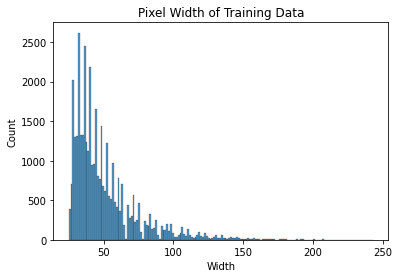

In [ ]:
sns.histplot(traindata["Width"])
plt.title("Pixel Width of Training Data")

Text(0.5, 1.0, 'Pixel Height of Test Data')

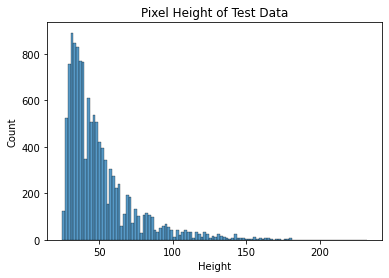

In [ ]:
sns.histplot(testdata["Height"])
plt.title("Pixel Height of Test Data")

Text(0.5, 1.0, 'Pixel Width of Test Data')

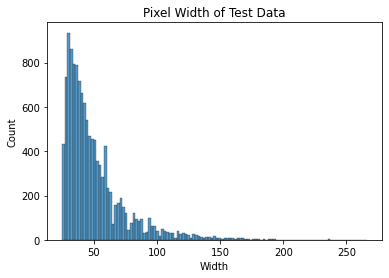

In [ ]:
sns.histplot(testdata["Width"])
plt.title("Pixel Width of Test Data")

([<matplotlib.axis.XTick at 0x7fc6cedc8070>,
 [Text(0, 0, 'Triangle'),
  Text(1, 0, 'Circle'),
  Text(2, 0, 'Diamond'),
  Text(3, 0, 'Hexagon'),
  Text(4, 0, 'Inverse Triangle')])

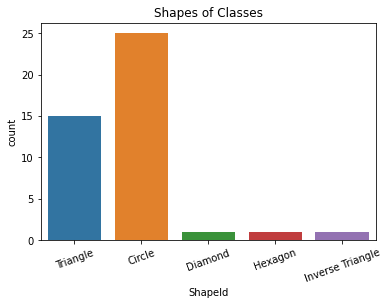

In [ ]:
sns.countplot(x=metadata["ShapeId"])
plt.title("Shapes of Classes")
plt.xticks([0, 1, 2, 3, 4], ['Triangle', 'Circle', 'Diamond', 'Hexagon','Inverse Triangle'],
       rotation=20)

([<matplotlib.axis.XTick at 0x7fc6ced36640>,
 [Text(0, 0, 'Red'),
  Text(1, 0, 'Blue'),
  Text(2, 0, 'Yellow'),
  Text(3, 0, 'White')])

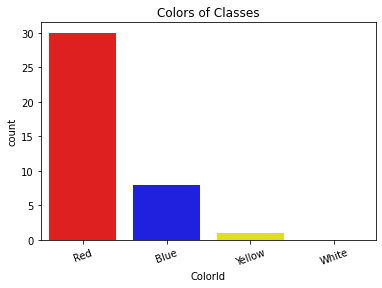

In [ ]:
sns.countplot(x=metadata["ColorId"], palette=["Red","Blue","Yellow","White"])
plt.title("Colors of Classes")
plt.xticks([0, 1, 2, 3], ['Red', 'Blue', 'Yellow', 'White'],
       rotation=20)

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
class_names = train_ds.class_names
print(class_names)

In [ ]:
augmen = ImageDataGenerator(
    rotation_range = 20,
    sheer_range = 0.2
    zoom_range = 0.2
)

# ***Preprocessing/Augmentation***

Multi-Class Traffic Sign Classification using AutoAugment and Spatial Transformer - Stanford Paper

Scale (range of cropped origin size is between 0.9 and 1.1)
• Ratio (range of the cropped origin aspect ratio cropped is between 0.75 and 1.33) 
• Rotation (-15 to 15 degrees) 
• Brightness (PyTorch brightness factor 0.5)
• Contrast (PyTorch contrast factor 0.5) 
• Saturation (PyTorch saturation factor 0.5) 
• Hue(PyTorch hue factor 0.1)

https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/

In [ ]:
import tensorflow as tf
import os

# Define image size and batch size
img_height = 32
img_width = 32
batch_size = 32

# Define directory path
data_dir = '/content/drive/MyDrive/German Road Signs Project/Train'

# Use image_dataset_from_directory to create train and validation datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset='training',
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset='validation',
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Use preprocessing layers to augment the data
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
])

# Apply the preprocessing layers to the datasets
train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y))
val_ds = val_ds.map(lambda x, y: (data_augmentation(x), y))

# Split validation data into validation and test data
val_data, test_data, val_labels, test_labels = train_test_split(val_test_data, val_test_labels, test_size=0.5, random_state=42)

# Note that since we are using image_dataset_from_directory, we don't need to define the 'data' and 'labels' arrays separately as we did before


Found 39222 files belonging to 43 classes.
Using 31378 files for training.
Found 39222 files belonging to 43 classes.
Using 7844 files for validation.


NameError: ignored

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((val_data, val_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels))


In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


NameError: ignored

In [ ]:
epochs = 10

history = model.fit(train_dataset.batch(batch_size),
                    validation_data=val_dataset.batch(batch_size),
                    epochs=epochs)


In [ ]:
test_loss, test_acc = model.evaluate(test_dataset.batch(batch_size))

print('Test accuracy:', test_acc)
